In [2]:
# ch4-2.py
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

In [3]:
# 데이터로드 (NHIS_OPEN_GJ_2017.csv : 데이터 원본 파일)
# encoding : 윈도우즈 환경에서의 한글 처리
# engine : python 3.6에서 한글이 포함된 파일이름 사용
%time rawData_org = pd.read_csv('datasets/국민건강정보/NHIS_OPEN_GJ_2017.csv', encoding='CP949', engine='python')

Wall time: 31.6 s


In [4]:
# 원본데이터의 튜플 수와 컬럼수 출력
rawData_org.shape

(1000000, 34)

In [5]:
# 의사결정트리에 사용할 속성리스트
feature_columns_to_use = ['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)',
                    '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '트리글리세라이드', 'HDL콜레스테롤',
                    'LDL콜레스테롤', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부']

rawData = rawData_org[feature_columns_to_use]

In [6]:
# 속성값이 NULL인 튜플 제외
rawData = rawData.dropna()

# 인덱스 재설정
rawData.reset_index(inplace=True, drop=True)

# 원본데이터의 튜플 수와 컬럼수 출력
rawData.shape

(990910, 22)

In [7]:
import random as rd  # 샘플링을 위한 random 패키지 임포트

# 1) 샘플링을 통한 수량 축소
# 원본데이터 중 50,000개를 튜플만 샘플링
# len() : 데이터프레임의 크기를 구하는 함수
sample_idx = rd.sample(range(0, len(rawData)), 50000)

# 인덱스 값 정렬(오름차순)
sample_idx.sort()

sample_idx

[3,
 40,
 48,
 70,
 93,
 95,
 102,
 139,
 218,
 219,
 221,
 227,
 238,
 242,
 248,
 251,
 264,
 266,
 291,
 309,
 314,
 339,
 341,
 353,
 373,
 403,
 425,
 431,
 454,
 461,
 463,
 494,
 539,
 568,
 574,
 579,
 581,
 587,
 631,
 652,
 681,
 703,
 709,
 730,
 743,
 752,
 753,
 756,
 760,
 761,
 798,
 815,
 822,
 832,
 833,
 845,
 850,
 852,
 855,
 868,
 870,
 893,
 895,
 897,
 953,
 961,
 986,
 992,
 1003,
 1047,
 1060,
 1067,
 1080,
 1104,
 1135,
 1145,
 1189,
 1212,
 1218,
 1301,
 1330,
 1414,
 1428,
 1481,
 1511,
 1515,
 1516,
 1521,
 1537,
 1543,
 1556,
 1565,
 1644,
 1738,
 1760,
 1761,
 1772,
 1781,
 1782,
 1892,
 1906,
 1911,
 1924,
 1958,
 1960,
 1961,
 1963,
 2011,
 2025,
 2042,
 2047,
 2061,
 2151,
 2152,
 2168,
 2190,
 2208,
 2235,
 2237,
 2247,
 2277,
 2344,
 2370,
 2378,
 2379,
 2465,
 2466,
 2473,
 2476,
 2498,
 2519,
 2557,
 2628,
 2630,
 2631,
 2644,
 2652,
 2670,
 2671,
 2682,
 2687,
 2691,
 2719,
 2743,
 2757,
 2775,
 2779,
 2827,
 2828,
 2832,
 2834,
 2863,
 2865,
 288

In [8]:
# 샘플링 된 인덱스로 구성된 샘플 데이터프레임 생성
rawData_sample = rawData.loc[sample_idx]

rawData_sample.reset_index(inplace=True, drop=True) #  인덱스 재설정

# 첫 10개의 행만 출력
rawData_sample.head(10)

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,2,12,155.0,55.0,67.5,0.9,1.0,1.0,1.0,138.0,...,97.0,52.0,88.0,1.0,0.6,21.0,24.0,30.0,1.0,1.0
1,1,12,160.0,60.0,83.0,0.5,0.8,1.0,1.0,118.0,...,73.0,40.0,126.0,1.0,0.8,15.0,15.0,48.0,3.0,1.0
2,1,13,170.0,65.0,86.4,1.0,1.0,1.0,1.0,132.0,...,199.0,58.0,97.0,1.0,1.1,24.0,25.0,42.0,2.0,1.0
3,1,7,170.0,85.0,95.0,0.6,0.6,1.0,1.0,133.0,...,136.0,59.0,120.0,1.0,0.6,33.0,31.0,60.0,3.0,1.0
4,1,10,165.0,65.0,85.0,0.8,1.0,1.0,1.0,120.0,...,161.0,81.0,240.0,1.0,0.9,21.0,41.0,29.0,3.0,0.0
5,1,12,170.0,60.0,73.0,1.5,1.2,1.0,1.0,127.0,...,60.0,45.0,112.0,1.0,1.0,21.0,19.0,18.0,3.0,1.0
6,1,13,155.0,55.0,81.5,1.0,0.7,1.0,1.0,150.0,...,73.0,69.0,159.0,1.0,0.7,21.0,21.0,32.0,2.0,1.0
7,2,12,150.0,50.0,64.0,0.5,0.3,1.0,1.0,117.0,...,76.0,79.0,106.0,3.0,0.7,16.0,14.0,12.0,1.0,0.0
8,2,8,155.0,55.0,72.6,0.7,0.7,1.0,1.0,102.0,...,48.0,64.0,130.0,1.0,0.6,64.0,29.0,42.0,1.0,0.0
9,2,10,150.0,50.0,72.0,1.5,1.5,1.0,1.0,130.0,...,86.0,68.0,108.0,1.0,0.7,16.0,10.0,9.0,1.0,1.0


In [9]:
rawData_sample.shape

(50000, 22)

In [10]:
# nonnumeric(categorical) 속성을 numeric 데이터로 변환
nonnumeric_columns = ['성별코드','음주여부']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for feature in nonnumeric_columns:
    rawData_sample[feature] = le.fit_transform(rawData_sample[feature])   

In [11]:
# 소스 데이터프레임에서 분류(classification)을 위한 속성 집합
X = rawData_sample.loc[:, feature_columns_to_use[:-1]]  
y = rawData_sample.loc[:, '음주여부']  # 분류 클래스(class)

from sklearn.model_selection import train_test_split  # 분석모형 선택에 관련된 모듈
    
# 자동으로 데이터셋을 트레이닝셋과 테스트셋으로 분리해주는 함수로
# 트레이닝셋과 데이터셋의 비율을 7:3으로 세팅함
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
# RMSLE 계산하는 사용자정의 함수
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values) :
    # 넘파이로 배열 형태로 변환
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제값에 1을 더하고 로그를 씌움
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 함
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균값 구함
    mean_difference = difference.mean()
    
    # 다시 루트를 씌움
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [13]:
# Scikit-Learn 패키지 : 머신 러닝 교육 및 실무를 위한 패키지로 샘플 데이터셋,
# 다양한 기계학습 기법에 대한 함수 등을 포함하고 있음
from sklearn.tree import DecisionTreeClassifier  # 의사결정트리 기법에 관련된 모듈

# DecisionTreeClassifier() : 의사결정트리를 생성하는 함수
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
decision_tree

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [14]:
# KFold 교차검증
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

%time score = cross_val_score(decision_tree, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()

# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

Wall time: 1.01 s
Score= 0.37541


In [15]:
# fit() : 트레이닝 데이터셋을 대상으로 의사결정트리 학습 진행
decision_tree.fit(X_train, y_train)

# tree.predict() 함수를 활용하여 의사결정트리를 대상으로 테스트셋을 예측
y_pred_tr = decision_tree.predict(X_test)

In [16]:
# 점수 출력
print("Train Set Score1 : {:.2f}".format(decision_tree.score(X_train, y_train)))
print("Test Set Score1 : {:.2f}".format(decision_tree.score(X_test, y_test)))

Train Set Score1 : 0.71
Test Set Score1 : 0.70


In [17]:
from sklearn.metrics import accuracy_score  # 분류 정확도(classification accuracy)를 계산하는 모듈

# accuracy_score() 함수를 활용하여 테스트셋의 실제 클래스와 예측된 클래스 간 정확도 측정
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.70


In [18]:
# 속성(feature) 별 중요도를 저장하는 데이터프레임 생성 
sel_feature = pd.DataFrame({'중요도' : decision_tree.feature_importances_}, index = feature_columns_to_use[:-1])

# 중요도의 내림차순으로 정렬
sel_feature.sort_values(by='중요도', ascending=False)

,중요도
성별코드,0.516194
연령대코드(5세단위),0.280426
감마지티피,0.095922
흡연상태,0.075328
HDL콜레스테롤,0.032131
허리둘레,0.000000
신장(5Cm단위),0.000000
(혈청지오티)ALT,0.000000
(혈청지오티)AST,0.000000
혈청크레아티닌,0.000000


In [19]:
# 의사결정트리 시각화를 위한 작업
# 트리 시각화를 위한 export_graphviz 모듈 임포트 (이를 위해 graphviz 별도 설치 필요)
from sklearn.tree import export_graphviz
import pydotplus  # graphviz의 dot language 와의 인터페이스를 제공하는 패키지 임포트
from IPython.display import Image  # IPython의 display와 관련된 Public API

x_list = list(X.columns)
y_list = list(y.drop_duplicates(inplace=False))

In [20]:
# export_graphviz() : 의사결정트리에 대한 graphviz dot data를 생성하는 함수
dot_data = export_graphviz(decision_tree, out_file=None, feature_names=x_list,
                          class_names=str(y_list), filled=True, rounded=True, special_characters=True)

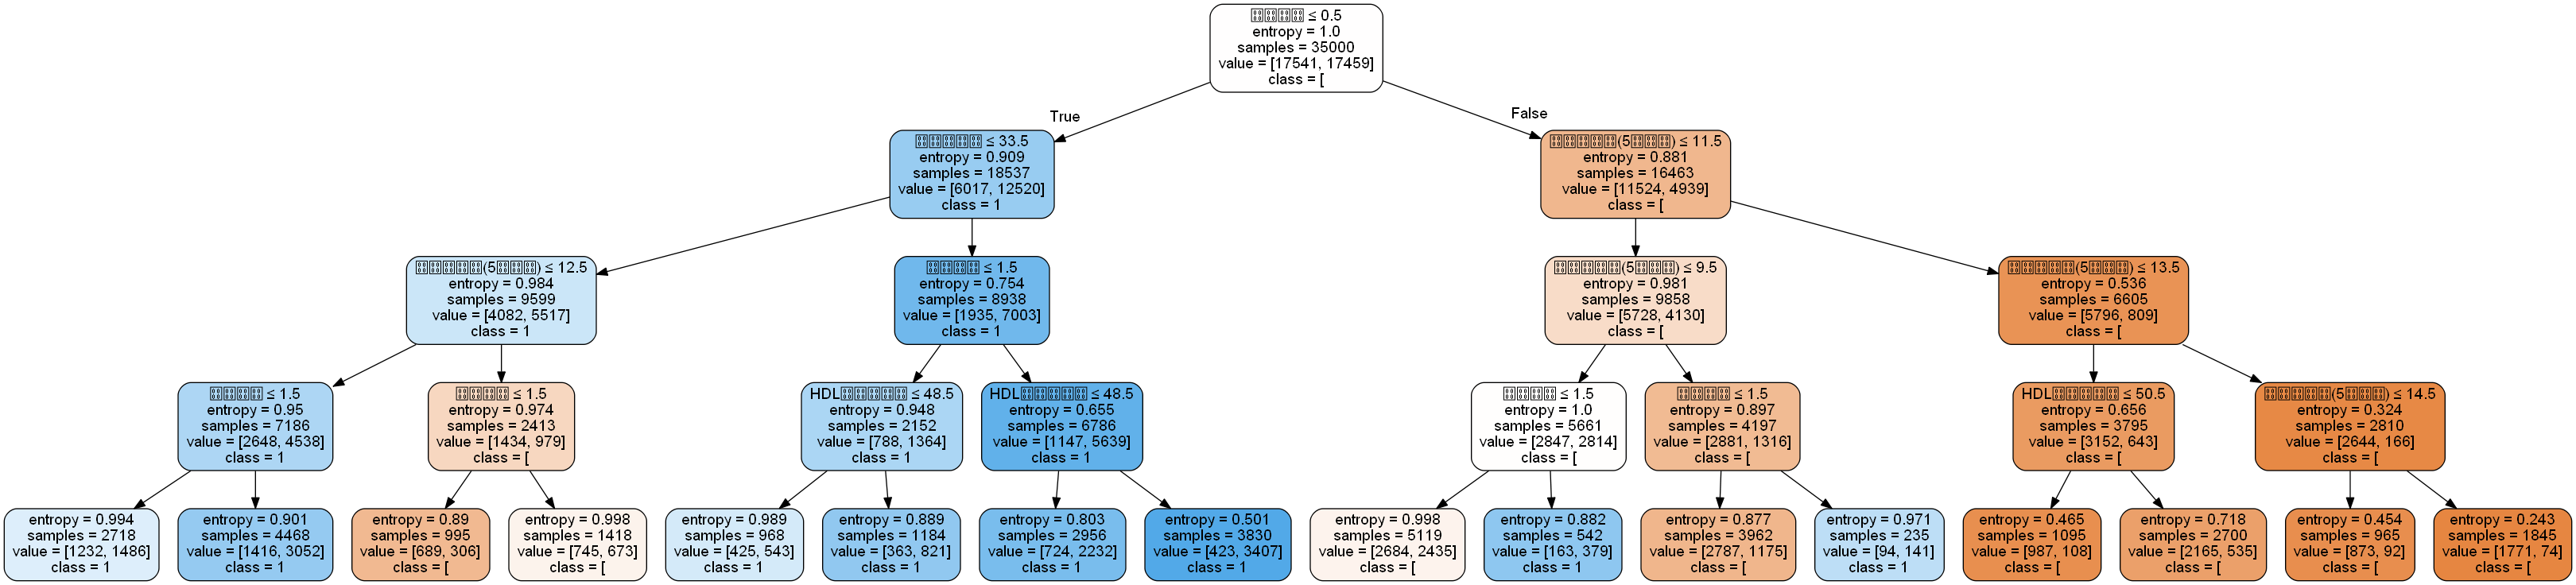

In [21]:
# matplotlib.rc('font', family='AppleGothic')
graph = pydotplus.graph_from_dot_data(dot_data)  # graphviz의 dot data로부터 트리 그래프 생성

# 트리 그래프를 위한 png 이미지 생성 및 출력
Image(graph.create_png())